### Mobile Games AB Testing with Cookie Cats

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [4]:
df = pd.read_csv('результаты А_B - cookie_cats 2.csv')
df.head(5)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1


In [5]:
df['userid'].nunique()

90189

In [6]:
df.groupby('version')[['userid']].nunique()

,userid
version,
gate_30,44700
gate_40,45489


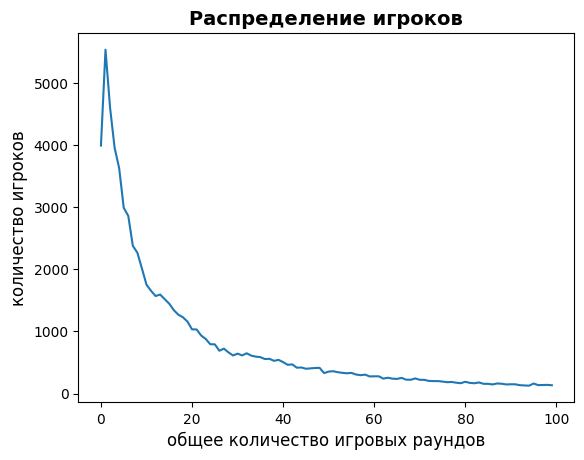

In [8]:
plot_df = df.groupby('sum_gamerounds')['userid'].count()
ax = plot_df.head(100).plot()
plt.title('Распределение игроков', fontweight = 'bold', size = 14)
plt.xlabel('общее количество игровых раундов', size = 12)
plt.ylabel('количество игроков', size = 12)
plt.show()

In [9]:
df[df['sum_gamerounds']== 0]['userid'].count()

3994

По проведенной части анализа датасета видно, что из 90189 уникальных игроков 3994 в нее ни разу не играли, а только установили.

In [10]:
df_retention = df[['retention_1', 'retention_7']].mean()*100
print(f'1-day retention соотношение: {round(df_retention[0],2)}% \
      \n7-days retention соотношение: {round(df_retention[1],2)}%')

1-day retention соотношение: 44.52%       
7-days retention соотношение: 18.61%


In [11]:
df_retention_ab = df.groupby('version').agg({'userid':'count', 'retention_1':'mean','retention_7':'mean', 'sum_gamerounds':'sum'})
df_retention_ab

,userid,retention_1,retention_7,sum_gamerounds
version,,,,
gate_30,44700,0.448188,0.190201,2344795
gate_40,45489,0.442283,0.182000,2333530


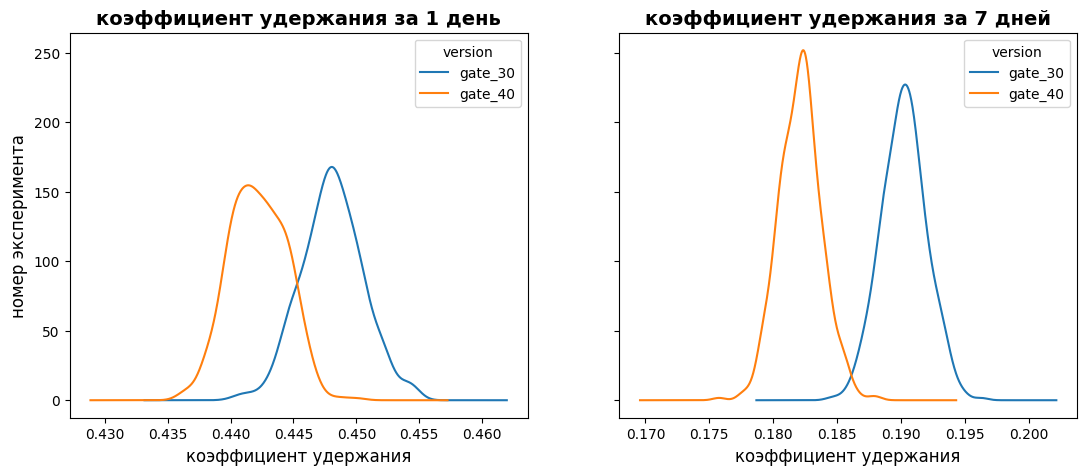

In [13]:
boot_1d = []
boot_7d = []
for i in range(500):
    boot_mean_1 = df.sample(frac = 1, replace=True).groupby('version')['retention_1'].mean()
    boot_mean_7 = df.sample(frac = 1, replace=True).groupby('version')['retention_7'].mean()
    boot_1d.append(boot_mean_1)
    boot_7d.append(boot_mean_7)

boot_1d = pd.DataFrame(boot_1d)
boot_7d = pd.DataFrame(boot_7d)

fig, (ax1,ax2) = plt.subplots(1, 2, sharey = True, figsize = (13,5))

boot_1d.plot.kde(ax = ax1)
ax1.set_xlabel('коэффициент удержания', size = 12)
ax1.set_ylabel('номер эксперимента', size = 12)
ax1.set_title('коэффициент удержания за 1 день', fontweight = 'bold', size = 14)

boot_7d.plot.kde(ax = ax2)
ax2.set_xlabel('коэффициент удержания', size = 12)
ax2.set_title('коэффициент удержания за 7 дней', fontweight = 'bold',size = 14)
plt.show()

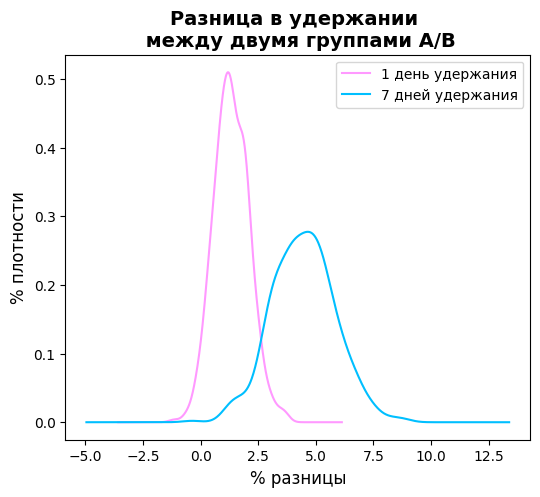

In [15]:
boot_1d['diff'] = ((boot_1d['gate_30'] - boot_1d['gate_40']) / boot_1d['gate_40'] * 100)
boot_7d['diff'] = ((boot_7d['gate_30'] - boot_7d['gate_40']) / boot_7d['gate_40'] * 100)

fig, (ax1) = plt.subplots(1, 1,figsize = (6,5))

boot_1d['diff'].plot.kde(ax = ax1, c = '#ff99ff', label = '1 день удержания')
boot_7d['diff'].plot.kde(ax = ax1, c = '#00bfff', label = '7 дней удержания')
ax1.set_xlabel('% разницы', size = 12)
ax1.set_ylabel('% плотности', size = 12)
ax1.set_title('Разница в удержании \n между двумя группами A/B', fontweight = 'bold', size = 14)
plt.legend()
plt.show()

In [16]:
prob_1 = (boot_1d['diff']>0).sum() / len(boot_1d['diff'])

prob_7 = (boot_7d['diff']>0).sum() / len(boot_7d['diff'])

print(f'Вероятность того, что 1-дневное удержание выше, когда gate_30: {round(prob_1,2) * 100}% \
      \nВероятность того, что 7-дневное удержание выше, когда gate_30: {(prob_7) * 100}%')

Вероятность того, что 1-дневное удержание выше, когда gate_30: 97.0%       
Вероятность того, что 7-дневное удержание выше, когда gate_30: 99.8%


### Заключение

С вероятностью 99,8% 7-дневное удержание уникальных игроков выше в контрольной группе (gate_30), чем в тестируемой (gate_40).